---
# **RED NEURONAL RECURRENTE (LSTM)**
---
> **Regresión (Serie de Tiempo)** Precio de acciones de Google.

> *Dataset tomado de*: https://tinyurl.com/dataset-tel-acciones

> *Desarrollado por*: **Moisés Evangelista G.** (moises.evangelista@urp.edu.pe)

---


In [2]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.12.0


Montando Google Drive:

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mostrando lista de archivos:

In [4]:
%%bash

MYPROJECT="/content/sample_data"
ls -l "$MYPROJECT"
echo "$MYPROJECT" > config.txt

total 55656
-rwxr-xr-x 1 root root     1697 Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root   301141 Apr 21 13:38 california_housing_test.csv
-rw-r--r-- 1 root root  1706430 Apr 21 13:38 california_housing_train.csv
-rw-r--r-- 1 root root 18289443 Apr 21 13:38 mnist_test.csv
-rw-r--r-- 1 root root 36523880 Apr 21 13:38 mnist_train_small.csv
-rwxr-xr-x 1 root root      930 Jan  1  2000 README.md
-rw-r--r-- 1 root root     7031 Apr 25 03:06 TELEFBC1_test.csv
-rw-r--r-- 1 root root   145122 Apr 25 03:06 TELEFBC1_train.csv




---

 ## PARTE I - PREPROCESAMIENTO DE DATOS
 

---



In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importando dataset
project_folder = open('config.txt').readline().rstrip('\n')
dataset_train = pd.read_csv(project_folder+'/TELEFBC1_train.csv')
# Considerando el precio de apertura "Close"
training_set = dataset_train.iloc[:, 2:3].values

# Feature Scaling
# Estandarizacion: (x-u)/dev

# Normalizacion: (x-min)/(max-min) --> feature_range [0 - 1]
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Estructura de 60 datos de entrada (t) y 1 dato de salida (t+1)  X[1-60] --> y[61]
train_len = len(dataset_train)
amplitude = 60

print("Número de elementos de la serie (Train): ", train_len)
print("Amplitud: ", amplitude)

X_train = []
y_train = []

for i in range(amplitude, train_len):
    X_train.append(training_set_scaled[i-amplitude:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Redimensionando X_train (train_len,amplitude,1)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print ("Dimensión de X_train: ",X_train.shape)
print ("Dimensión de y_train: ",y_train.shape)

Número de elementos de la serie (Train):  1749
Amplitud:  60
Dimensión de X_train:  (1689, 60, 1)
Dimensión de y_train:  (1689,)


In [6]:
print(dataset_train.iloc[:, 2:3].values)
print(dataset_train.iloc[:, 2:3].columns)

[[2.45]
 [2.45]
 [2.47]
 ...
 [0.6 ]
 [0.6 ]
 [0.6 ]]
Index(['Cierre'], dtype='object')




---

## PARTE II - CONSTRUYENDO LA RED NEURONAL RECURRENTE
 

---



In [8]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# inicializando the RNN
rnn_model = Sequential()

# 1ra capa LSTM y Dropout para regularización.
# input_shape (amplitude,1)
rnn_model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# 20% de las neuronas serán ignoradas durante el training (20%xNodos = 10)
# Para hacer menos probable el overfiting
rnn_model.add(Dropout(rate=0.2))

# 2da capa LSTM y Dropout para regularización.
rnn_model.add(LSTM(units = 50, return_sequences = True))
rnn_model.add(Dropout(rate=0.2))

# 3ra capa LSTM y Dropout para regularización.
rnn_model.add(LSTM(units = 50, return_sequences = True))
rnn_model.add(Dropout(rate=0.2))

# 4ta capa LSTM y Dropout para regularización.
rnn_model.add(LSTM(units = 50, return_sequences = False))
rnn_model.add(Dropout(rate=0.2))

# Output layer
rnn_model.add(Dense(units = 1))

rnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_5 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)               

In [9]:
import datetime
print('Iniciando a las: ', datetime.datetime.now())
print("...")

# Compiling the RNN
rnn_model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Entrenamiento de la RNN con nuestro Training set
rnn_model.fit(X_train, y_train, epochs = 20, batch_size = 32)

print("...")
print('Terminando a las: ', datetime.datetime.now())


Iniciando a las:  2023-04-25 03:07:32.432477
...
Epoch 1/20
53/53 [==============================] - 13s 15ms/step - loss: 0.0392
Epoch 2/20
53/53 [==============================] - 1s 14ms/step - loss: 0.0073
Epoch 3/20
53/53 [==============================] - 1s 13ms/step - loss: 0.0070
Epoch 4/20
53/53 [==============================] - 1s 14ms/step - loss: 0.0065
Epoch 5/20
53/53 [==============================] - 1s 13ms/step - loss: 0.0061
Epoch 6/20
53/53 [==============================] - 1s 14ms/step - loss: 0.0053
Epoch 7/20
53/53 [==============================] - 1s 14ms/step - loss: 0.0056
Epoch 8/20
53/53 [==============================] - 1s 15ms/step - loss: 0.0055
Epoch 9/20
53/53 [==============================] - 1s 19ms/step - loss: 0.0049
Epoch 10/20
53/53 [==============================] - 1s 19ms/step - loss: 0.0049
Epoch 11/20
53/53 [==============================] - 1s 20ms/step - loss: 0.0046
Epoch 12/20
53/53 [==============================] - 1s 15ms/step - 

---

 ## PARTE III - PREDICCIONES Y VISUALIZACION DE RESULTADOS
 

---




In [10]:
# Precio de Acción reales (2019)
dataset_test = pd.read_csv(project_folder+'/TELEFBC1_test.csv')
real_stock_price = dataset_test.iloc[:, 2:3].values

test_len = len(dataset_test)
print("Número de elementos de la serie (Test): ", test_len)

# Precio de Acción pronosticados (2019)
# Concatenar en un solo vector (train + test)
dataset_total = pd.concat((dataset_train['Cierre'], dataset_test['Cierre']), axis = 0)

# Obteniendo los 60 datos anteriores al primer elemento del Test set
inputs = dataset_total[len(dataset_total) - test_len - amplitude:].values

# Redimensionando de (x,) --> (x,1)
inputs = inputs.reshape(-1,1)

# Feature Scaling
inputs = sc.transform(inputs)

X_test = []

for i in range(0, test_len):
    X_test.append(inputs[i:i + amplitude, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print ("Dimensión de X_test: ",X_test.shape)

predicted_stock_price = rnn_model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Número de elementos de la serie (Test):  83
Dimensión de X_test:  (83, 60, 1)
3/3 [==============================] - 1s 9ms/step


---

 #### VISUALIZACION DE RESULTADOS
 

---

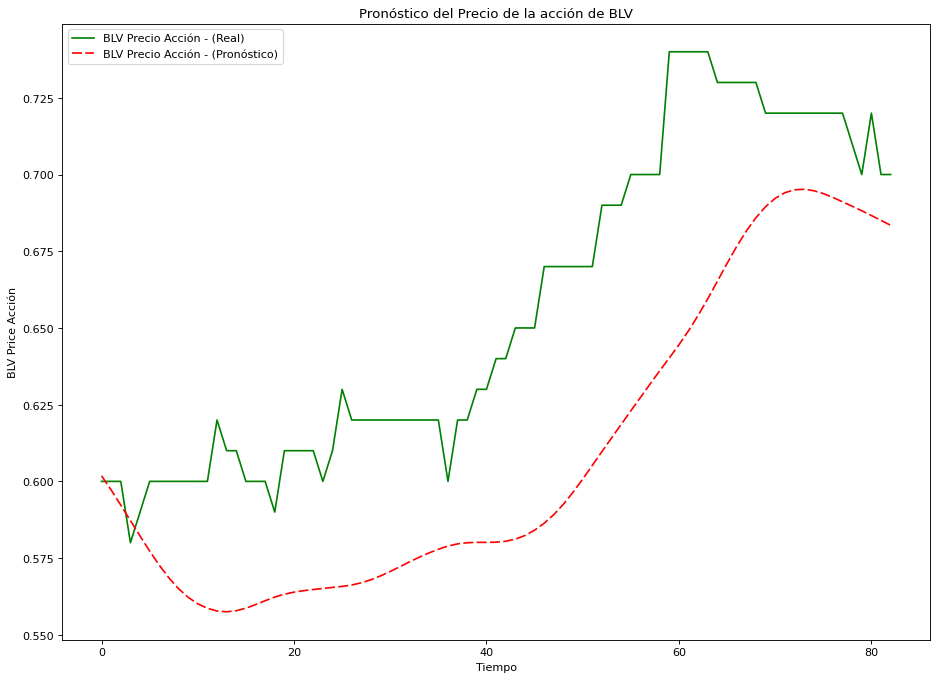

In [12]:
# Visualizando resultados
plt.figure(figsize=(14,10),dpi=80)
plt.plot(real_stock_price, color = 'Green', label = 'BLV Precio Acción - (Real)')
plt.plot(predicted_stock_price, color = 'red', label = 'BLV Precio Acción - (Pronóstico)', dashes=[6, 2])
plt.title('Pronóstico del Precio de la acción de BLV')
plt.xlabel('Tiempo')
plt.ylabel('BLV Price Acción')
plt.legend()
plt.show()

---

 #### RMSE
 

---

In [13]:
# RMSE
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

In [14]:
print ("rmse: ", rmse)

rmse:  0.052401820847342254
